In [ ]:
def div(num,den):
    print(locals())
    return num/den

In [ ]:
div(1,2)

In [ ]:
div(2,1)

In [ ]:
num = 1
den = 2
div(num,den)

In [ ]:
div(den,num)

In [ ]:
div(den=2, num=1)

In [ ]:
def suma(a,b):
    return a + b

In [ ]:
suma(3,5,6)

In [ ]:
suma(a=3,b=5,c=6)

In [ ]:
def suma(lst):
    res = 0
    for num in lst:
        res += num
    return res

In [ ]:
suma(3,4,5)

In [ ]:
suma([3,4,5])

### Packing

In [ ]:
a = 7,8
print(type(a))
print(a)

### Unpacking

In [ ]:
n,m = a
print(n)
print(m)

## n-positionals

In [ ]:
def suma(*lst):
    res = 0
    for num in lst:
        res += num
    return res

In [ ]:
suma(1,2,3,4)

In [ ]:
def print_args(*args):
    print(locals())
    print(f"Type: {type(args)}")
    print(f"Len: {len(args)}")
    print(f"Value: {args}")

In [ ]:
print_args(1,2,[3,4])

In [ ]:
print_args()

In [ ]:
def print_abc(a,b,c):
    for var in [a,b,c]:
        print(type(var))
        print(var)
        print("-"*40)

In [ ]:
print_abc(1,"2",[3,4])

In [ ]:
print_abc(*[1,3],2)

print_abc(*[1,3],2)
> print_abc(1,3,2)
>> ```python
    def print_abc(a=1,b=3,c=2):
        for var in [a,b,c]:
            print(type(var))
            print(var)
            print("-"*40)
>>  ```

In [ ]:
def salute(name, age, course):
    return f"Hello, my name is {name}, I'm {age} and I study {course}"

In [ ]:
salute("Pepe",25,"Data")

In [ ]:
pepe = ["Pepe",25,"Data"]

In [ ]:
salute(*pepe)

In [ ]:
students = [
    ["Pepe",25,"Data"],
    ["Lola","UX",27],
    [32,"Rocio","Data"]
]

In [ ]:
salute(*students)

In [ ]:
for stud in students:
    print(salute(*stud))

## n-keyword arguments

In [ ]:
def print_kwargs(**kwargs):
    print(f"Type: {type(kwargs)}")
    print(f"Len: {len(kwargs)}")
    print(f"Value: {kwargs}")

In [ ]:
print_kwargs(size=3, color="red", city="Madrid", whatever=[1,2,3,4,(5,6)], dictionary={"A":"a","B":"b"})

In [ ]:
pepe = {"age":21, "course":"Data","name":"Pepe"}

In [ ]:
salute(**pepe)

-----

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../datasets/pokemon.csv")

In [3]:
df.loc[55]

#                  50
Name          Diglett
Type 1         Ground
Type 2            NaN
Total             265
HP                 10
Attack             55
Defense            25
Sp. Atk            35
Sp. Def            45
Speed              95
Generation          1
Legendary       False
Name: 55, dtype: object

In [4]:
print_kwargs(**df.loc[55])

NameError: name 'print_kwargs' is not defined

In [5]:
dict(**df.loc[26])

{'#': 21,
 'Name': 'Spearow',
 'Type 1': 'Normal',
 'Type 2': 'Flying',
 'Total': 262,
 'HP': 40,
 'Attack': 60,
 'Defense': 30,
 'Sp. Atk': 31,
 'Sp. Def': 31,
 'Speed': 70,
 'Generation': 1,
 'Legendary': False}

In [6]:
{**df.loc[16]}

{'#': 13,
 'Name': 'Weedle',
 'Type 1': 'Bug',
 'Type 2': 'Poison',
 'Total': 195,
 'HP': 40,
 'Attack': 35,
 'Defense': 30,
 'Sp. Atk': 20,
 'Sp. Def': 20,
 'Speed': 50,
 'Generation': 1,
 'Legendary': False}

In [7]:
import matplotlib.pyplot as plt

(array([1., 5., 3., 6., 1., 4., 5., 4., 0., 3.]),
 array([ 50.,  63.,  76.,  89., 102., 115., 128., 141., 154., 167., 180.]),
 <BarContainer object of 10 artists>)

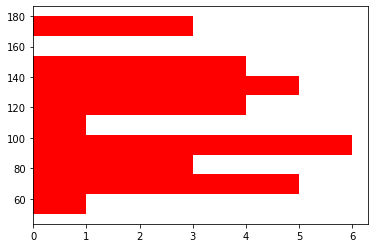

In [8]:
plt.hist(df[df["Type 1"]=="Dragon"]["Attack"],color="red",orientation="horizontal")

In [38]:
def type_hist(typ, color, orientation="vertical", **kwargs):
    plt.hist(df[df["Type 1"]==typ]["Attack"],color=color,orientation=orientation, label=typ)
    plt.legend()

In [39]:
from settings import types

In [40]:
types["Fire"]

{'color': 'firebrick', 'orientation': 'vertical', 'cool': True}

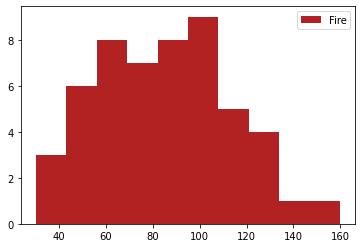

In [41]:
type_hist("Fire","firebrick","vertical")

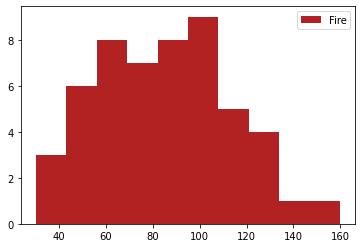

In [42]:
type_hist("Fire", **types["Fire"])

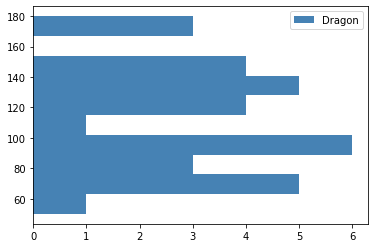

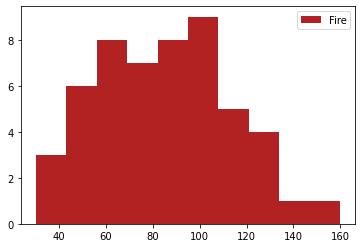

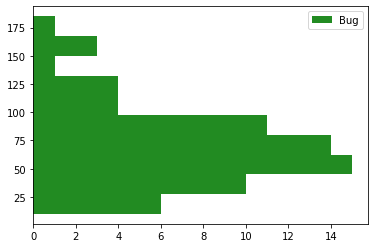

In [43]:
for typ in ["Dragon","Fire","Bug"]:
    plt.figure()
    type_hist(typ, **types[typ])

In [44]:
types.get("Grass", "Default Parameter")

'Default Parameter'

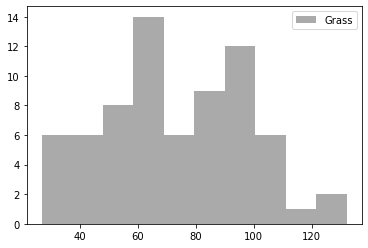

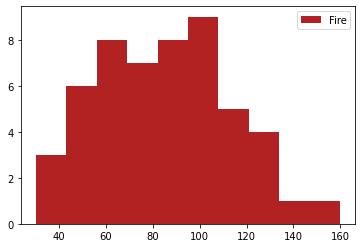

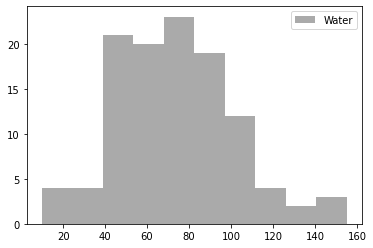

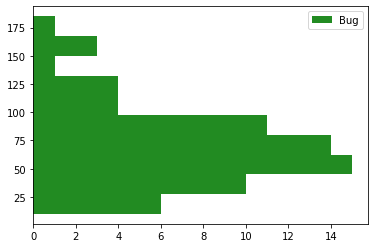

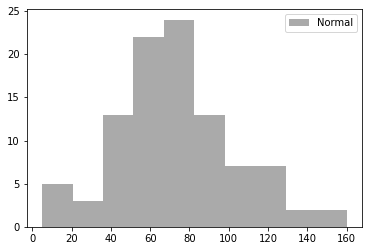

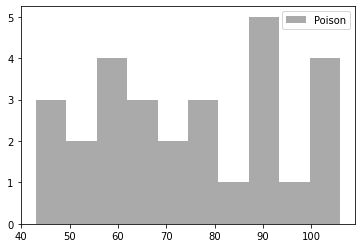

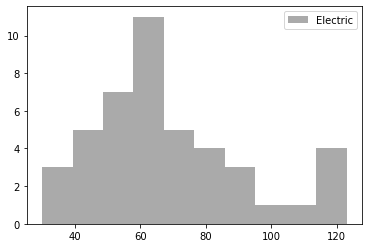

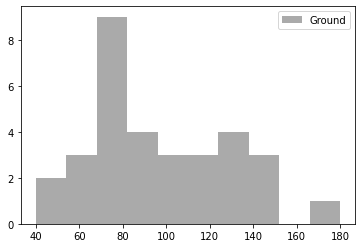

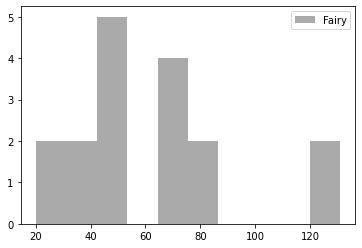

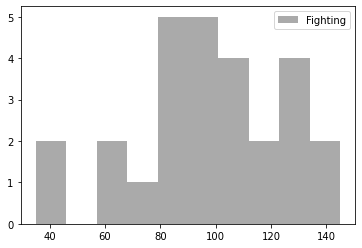

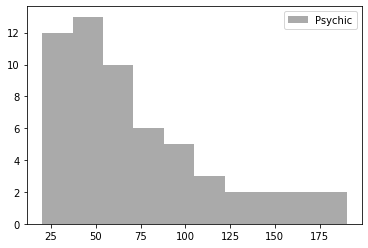

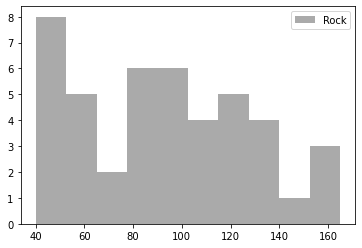

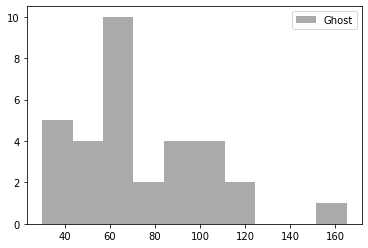

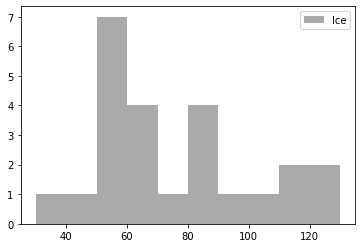

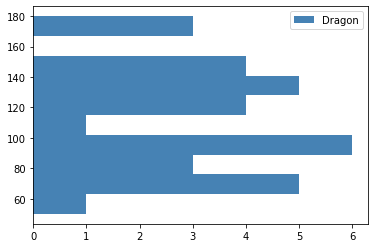

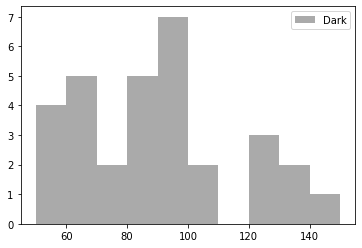

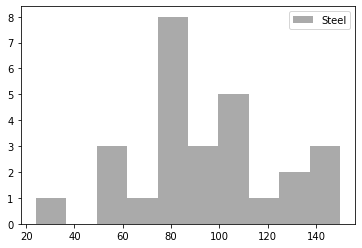

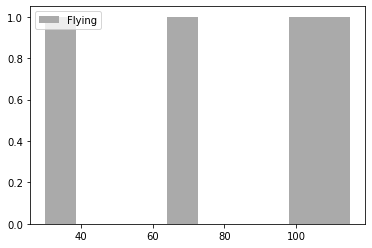

In [49]:
for typ in df["Type 1"].unique():
    plt.figure()
    type_hist(typ, **types.get(typ, {"color":"#AAAAAA"}))

In [120]:
df = df.rename(columns={"Type 1": "type1", "Type 2": "type2", "Attack":"attack", "Defense":"defense"})
df.head()

,#,Name,type1,type2,Total,HP,attack,defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [123]:
def new_value(type1,type2,attack,defense,**_):
    if type1 == "Dragon" or type2 == "Dragon":
        attack = 2*attack
    if type1 == "Bug" or type2 == "Bug":
        attack = .5*attack
    return attack + defense
    
df.apply(lambda row : new_value(**row),axis=1)

0       98.0
1      125.0
2      165.0
3      223.0
4       95.0
       ...  
795    250.0
796    270.0
797    170.0
798    220.0
799    230.0
Length: 800, dtype: float64

In [128]:
## What would be the alternative?

df["new_value"] = df["attack"]+df["defense"]
df[(df["type1"]=="Dragon") | (df["type2"]=="Dragon")]["new_value"] = df[(df["type1"]=="Dragon") | (df["type2"]=="Dragon")]["attack"]*2 + df[(df["type1"]=="Dragon") | (df["type2"]=="Dragon")]["defense"]
df[(df["type1"]=="Bug") | (df["type2"]=="Bug")]["new_value"] = df[(df["type1"]=="Bug") | (df["type2"]=="Bug")]["attack"]/2 + df[(df["type1"]=="Bug") | (df["type2"]=="Bug")]["defense"]

<ipython-input-128-810464812c9b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(df["type1"]=="Dragon") | (df["type2"]=="Dragon")]["new_value"] = df[(df["type1"]=="Dragon") | (df["type2"]=="Dragon")]["attack"]*2 + df[(df["type1"]=="Dragon") | (df["type2"]=="Dragon")]["defense"]
<ipython-input-128-810464812c9b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(df["type1"]=="Bug") | (df["type2"]=="Bug")]["new_value"] = df[(df["type1"]=="Bug") | (df["type2"]=="Bug")]["attack"]/2 + df[(df["type1"]=="Bug

In [130]:
df["new_value"]

0       98
1      125
2      165
3      223
4       95
      ... 
795    250
796    270
797    170
798    220
799    230
Name: new_value, Length: 800, dtype: int64

## Recap

### Arguments

- Every function may receive (or not) positional arguments or keyword arguments.

- Positional Arguments
> The `order` in which you pass the values matters

- Keyword Arguments
> The `name` of the argument matters


### Star Operator

### Single star `*`

- On the definition of a function, it will turn the positional arguments given into a tuple.

Examples:

In [50]:
def single_star(*args):
    print(args)
single_star()
single_star(1)
single_star(1,2,3)

()
(1,)
(1, 2, 3)


- Packed arguments (`*args`) can follow positional arguments

In [51]:
def pos_star(first,second,*args):
    print(f"first: {first}")
    print(f"second: {second}")
    print(f"args: {args}")
pos_star()

TypeError: pos_star() missing 2 required positional arguments: 'first' and 'second'

In [52]:
pos_star(1)

TypeError: pos_star() missing 1 required positional argument: 'second'

In [53]:
pos_star(1,2)

first: 1
second: 2
args: ()


In [54]:
pos_star(1,2,3)
pos_star(1,2,3,4,5,6)

first: 1
second: 2
args: (3,)
first: 1
second: 2
args: (3, 4, 5, 6)


- Packed arguments (`*args`) can be followed by keyword arguments only (with or without default value).

In [63]:
def pos_star_key(first,*args,second):
    print(f"first: {first}")
    print(f"second: {second}")
    print(f"args: {args}")
pos_star_key(1,2,3,4,5)

TypeError: pos_star_key() missing 1 required keyword-only argument: 'second'

In [64]:
pos_star_key(1,2,3,4,second=5)

first: 1
second: 5
args: (2, 3, 4)


- When `calling` a function, the star operator `*` will unpack an iterable (list, tuple, etc.) into positional arguments.

In [67]:
def pos(a,b,c,d,e,f):
    print(a,b,c,d,e,f)

lst = [1,2,3,4,5,6] 
tup = (1,2,3,4,5,6)
set_ = {"a","b","c","d","e","f"}
dic = {"a":1,"b":2,"c":3,"d":4,"e":5,"f":6}
pos(*lst)
pos(*tup)
# Warning ⚠️ : Sets have no order!!!!
pos(*set_)

1 2 3 4 5 6
1 2 3 4 5 6
b c a f d e


In [70]:
# Iterating a dictionary is iterating the keys
pos(*dic)

a b c d e f


In [72]:
pos(*dic.values())

1 2 3 4 5 6


- Not all the arguments must come from the unpacking.
- The only rule is:
> `You must call a function with same number of arguments as set in the definition` (minus default parameters)

In [73]:
mini_lst = [4,5,6]
pos(1,2,3, *mini_lst)

1 2 3 4 5 6


#### Bonus
- Concatenating lists (with lists, tuples, etc.)

In [74]:
a = [1,2,3]
b = [4,5,6]
c = (7,8,9)
a + b

[1, 2, 3, 4, 5, 6]

In [75]:
a + c

TypeError: can only concatenate list (not "tuple") to list

In [79]:
[*a,*b]
## """""""Explaining"""""""
# []  == list()
# list is a "function"
# list(*a,*b)
# list([1, 2, 3, 4, 5, 6])

[1, 2, 3, 4, 5, 6]

In [77]:
[*a,*c]

[1, 2, 3, 7, 8, 9]

### Double Star `**`

- On the definition of a function  will convert given keyword arguments into a dictionary

Examples:

In [86]:
def keyword(**kwargs):
    print(kwargs)
keyword()
keyword(a=1)
keyword(a=1,b=2,c=3)

{}
{'a': 1}
{'a': 1, 'b': 2, 'c': 3}


- The double star operator does not pack positional arguments, only keywords

In [87]:
keyword(1,2,3)

TypeError: keyword() takes 0 positional arguments but 3 were given

- A function may receive positionals and keyword arguments, but the positional arguments must `ALWAYS`come first!

In [89]:
def pos_keyword(a,b,**kwargs):
    print(a,b,kwargs)

pos_keyword(1,2,c=3,d=4)

1 2 {'c': 3, 'd': 4}


In [90]:
pos_keyword(d=4,c=3,1,2)

SyntaxError: positional argument follows keyword argument (<ipython-input-90-e45ee12930b2>, line 1)

In [91]:
pos_keyword(1,2,d=4,c=3)

1 2 {'d': 4, 'c': 3}


- When calling a function, the double star operator will turn a dictionary into keyword arguments
- Warning ⚠️: The keys of the dictionary and the name of the parameters must be the `SAME`

In [93]:
def dict_key(a,b,c):
    print(f"a: {a}")
    print(f"b: {b}")
    print(f"c: {c}")

dict_key(c=3,b=2,a=1)

a: 1
b: 2
c: 3


In [94]:
dic = {"a":1,"c":3,"b":2}
dict_key(**dic)

a: 1
b: 2
c: 3


In [95]:
dic = {"a":1,"c":3}
dict_key(**dic)

TypeError: dict_key() missing 1 required positional argument: 'b'

In [96]:
dic = {"a":1,"c":3,"b":2,"d":4}
dict_key(**dic)

TypeError: dict_key() got an unexpected keyword argument 'd'

### Bonus

- Joining dictionaries

In [107]:
a = {"a":1,"b":2}
b = {"c":3,"d":4,"e":6}
c = {"a":5}
a+b

TypeError: unsupported operand type(s) for +: 'dict' and 'dict'

- If there are repeated keys, the resulting dictionary will take the value last seen (rightmost) for this key.

In [108]:
{**a,**b,**c}

{'a': 5, 'b': 2, 'c': 3, 'd': 4, 'e': 6}

## Bonus

`The "UNIVERSAL" function`

> It is posible to write a function that accepts ANY (or none) number of either positional and keyword arguments.

In [112]:
def universal(*args,**kwargs):
    print(args)
    print(kwargs)
    print("-"*40)

In [113]:
universal()

()
{}
----------------------------------------


In [114]:
universal(1)
universal(1,2,3)

(1,)
{}
----------------------------------------
(1, 2, 3)
{}
----------------------------------------


In [115]:
universal(a=1)
universal(a=1,b=2,c=3)

()
{'a': 1}
----------------------------------------
()
{'a': 1, 'b': 2, 'c': 3}
----------------------------------------


In [116]:
universal(1,2,3,4,a=1)
universal(1,2,3,a=1,b=2,c=3)

(1, 2, 3, 4)
{'a': 1}
----------------------------------------
(1, 2, 3)
{'a': 1, 'b': 2, 'c': 3}
----------------------------------------
